# Depression Analysis notebook 
In this notebook we are exploring and visualizing the dataset on depressed and non-depressed people

Please note, that data is one-hot encoded, and if the person has 0 on all education levels, it means they have Bachelor's degree. 

In [1]:
import pandas as pd
# From CSV file
df1 = pd.read_csv('train_cleaner2.csv')

### 1. Let's find out amongst which jobs depression is most and least common. 

#### Jobs with the highest depression rates. 

C:\Users\kveske\AppData\Local\Temp\ipykernel_4388\2616500220.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df.head(10),


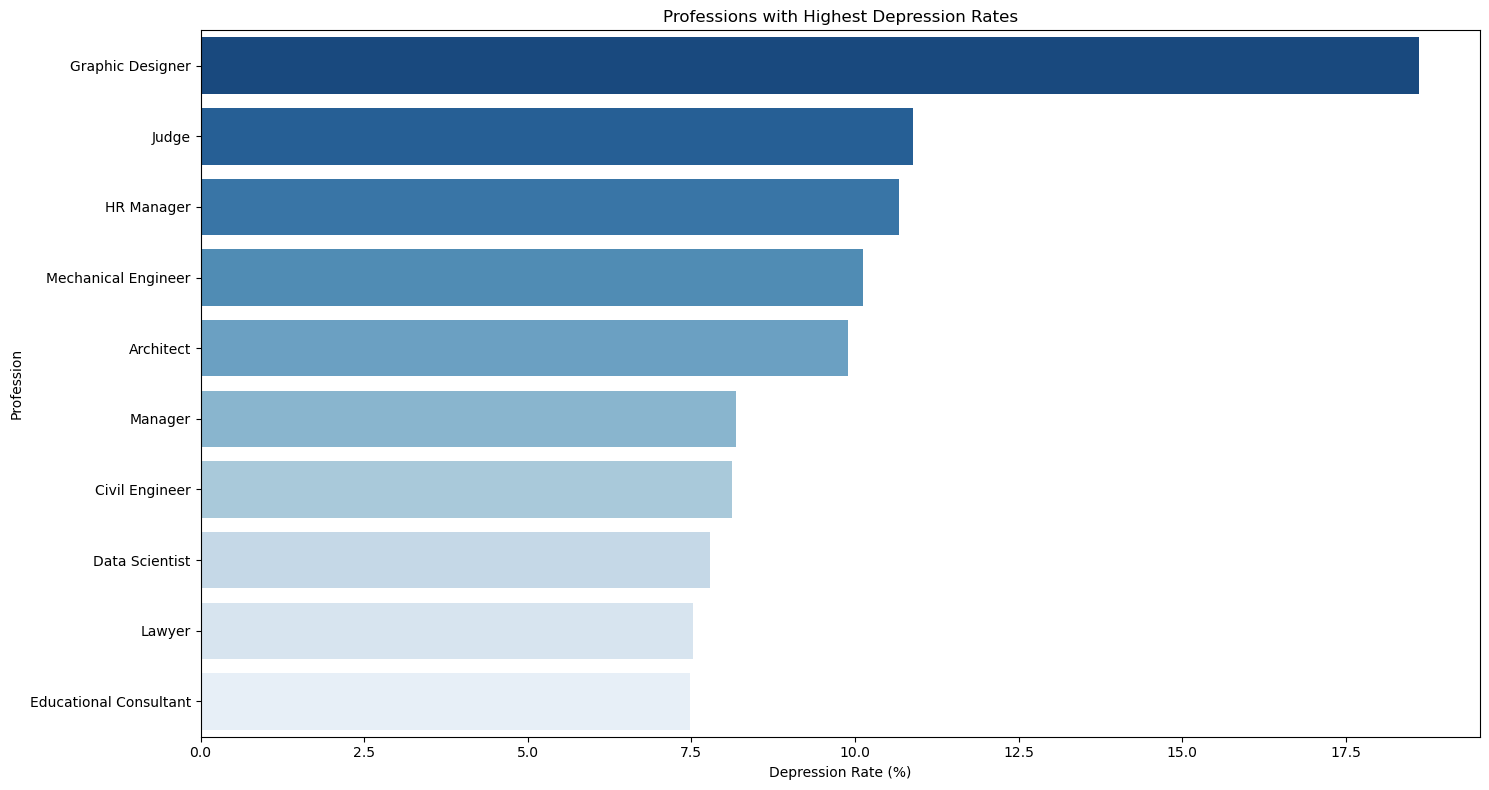


Top 10 Professions with Highest Depression Rates:
            Profession  Total Count  Depression Count  Depression Rate (%)
      Graphic Designer         1160               216                18.62
                 Judge         1710               186                10.88
            HR Manager         4018               429                10.68
   Mechanical Engineer         1176               119                10.12
             Architect         4365               432                 9.90
               Manager         1736               142                 8.18
        Civil Engineer         1466               119                 8.12
        Data Scientist         2387               186                 7.79
                Lawyer         2208               166                 7.52
Educational Consultant         2847               213                 7.48


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_profession_depression(df):
    """
    Analyze depression rates across different professions
    
    Parameters:
    df (pandas.DataFrame): Input dataframe with profession columns and depression indicator 'y'
    
    Returns:
    pandas.DataFrame: Sorted depression rates by profession
    """
    # Get all profession columns
    profession_cols = [col for col in df.columns if col.startswith('Profession_')]
    
    # Calculate depression rate for each profession
    profession_stats = []
    
    for profession in profession_cols:
        # Get people in this profession
        prof_group = df[df[profession] == 1]
        
        # Calculate statistics
        total_count = len(prof_group)
        depression_count = prof_group['y'].sum()
        depression_rate = (depression_count / total_count * 100) if total_count > 0 else 0
        
        profession_stats.append({
            'Profession': profession.replace('Profession_', ''),
            'Total Count': total_count,
            'Depression Count': depression_count,
            'Depression Rate (%)': round(depression_rate, 2)
        })
    
    # Convert to DataFrame and sort by depression rate
    results_df = pd.DataFrame(profession_stats)
    results_df = results_df.sort_values('Depression Rate (%)', ascending=False)
    
    # Create visualization
    plt.figure(figsize=(15, 8))
    sns.barplot(data=results_df.head(10), 
                x='Depression Rate (%)', 
                y='Profession',
                palette='Blues_r')
    plt.title('Professions with Highest Depression Rates')
    plt.xlabel('Depression Rate (%)')
    plt.ylabel('Profession')
    plt.tight_layout()
    #plt.savefig('plot.png')
    plt.show()    
    return results_df

# Run the analysis
results = analyze_profession_depression(df1)
print("\nTop 10 Professions with Highest Depression Rates:")
print(results.head(10).to_string(index=False))

#### The jobs with the lowest depression rates

C:\Users\kveske\AppData\Local\Temp\ipykernel_2980\4177825657.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df.head(10),


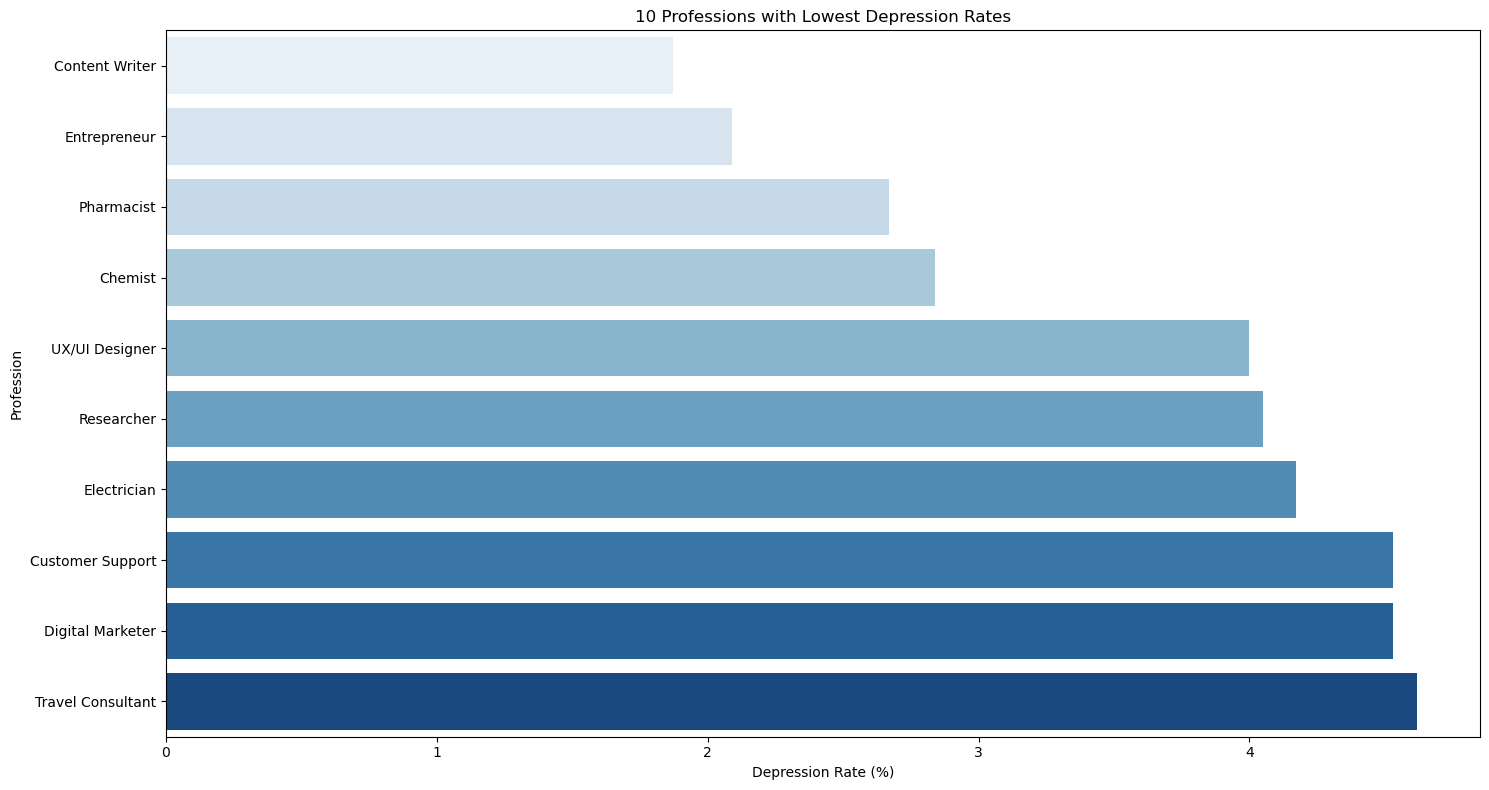


10 Professions with Lowest Depression Rates:
       Profession  Total Count  Depression Count  Depression Rate (%)
   Content Writer         7809               146                 1.87
     Entrepreneur         2965                62                 2.09
       Pharmacist         3889               104                 2.67
          Chemist         2962                84                 2.84
   UX/UI Designer         1449                58                 4.00
       Researcher         2323                94                 4.05
      Electrician         1581                66                 4.17
 Customer Support         2054                93                 4.53
 Digital Marketer         1369                62                 4.53
Travel Consultant         1860                86                 4.62

Note: Consider sample sizes when interpreting results:


In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_profession_depression(df):
    """
    Analyze depression rates across different professions, highlighting both highest and lowest rates
    
    Parameters:
    df (pandas.DataFrame): Input dataframe with profession columns and depression indicator 'y'
    
    Returns:
    pandas.DataFrame: Sorted depression rates by profession
    """
    # Get all profession columns
    profession_cols = [col for col in df.columns if col.startswith('Profession_')]
    
    # Calculate depression rate for each profession
    profession_stats = []
    
    for profession in profession_cols:
        # Get people in this profession
        prof_group = df[df[profession] == 1]
        
        # Calculate statistics
        total_count = len(prof_group)
        depression_count = prof_group['y'].sum()
        depression_rate = (depression_count / total_count * 100) if total_count > 0 else 0
        
        profession_stats.append({
            'Profession': profession.replace('Profession_', ''),
            'Total Count': total_count,
            'Depression Count': depression_count,
            'Depression Rate (%)': round(depression_rate, 2)
        })
    
    # Convert to DataFrame and sort by depression rate
    results_df = pd.DataFrame(profession_stats)
    results_df = results_df.sort_values('Depression Rate (%)', ascending=True)  # Changed to ascending=True
    
    # Create visualization for lowest depression rates
    plt.figure(figsize=(15, 8))
    sns.barplot(data=results_df.head(10), 
                x='Depression Rate (%)', 
                y='Profession',
                palette='Blues')  # Changed color palette to be more intuitive
    plt.title('10 Professions with Lowest Depression Rates')
    plt.xlabel('Depression Rate (%)')
    plt.ylabel('Profession')
    plt.tight_layout()
    plt.show()
    
    return results_df

# Run the analysis
results = analyze_profession_depression(df1)
print("\n10 Professions with Lowest Depression Rates:")
print(results.head(10).to_string(index=False))

# Also show sample size information
print("\nNote: Consider sample sizes when interpreting results:")
small_samples = results[results['Total Count'] < 10].sort_values('Total Count')
if not small_samples.empty:
    print("\nProfessions with small sample sizes (< 10 people):")
    print(small_samples[['Profession', 'Total Count']].to_string(index=False))

### 2. Let's find out depression differences across different education levels. 
First, we'll analyze all the people in our dataset. Second, we'll analyze data with age over 30, with the hypothesis, that these people aren't active students anymore therefore this is and will be highest acquired education level. 

#### People in all ages

C:\Users\kveske\AppData\Local\Temp\ipykernel_2980\934430754.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df,


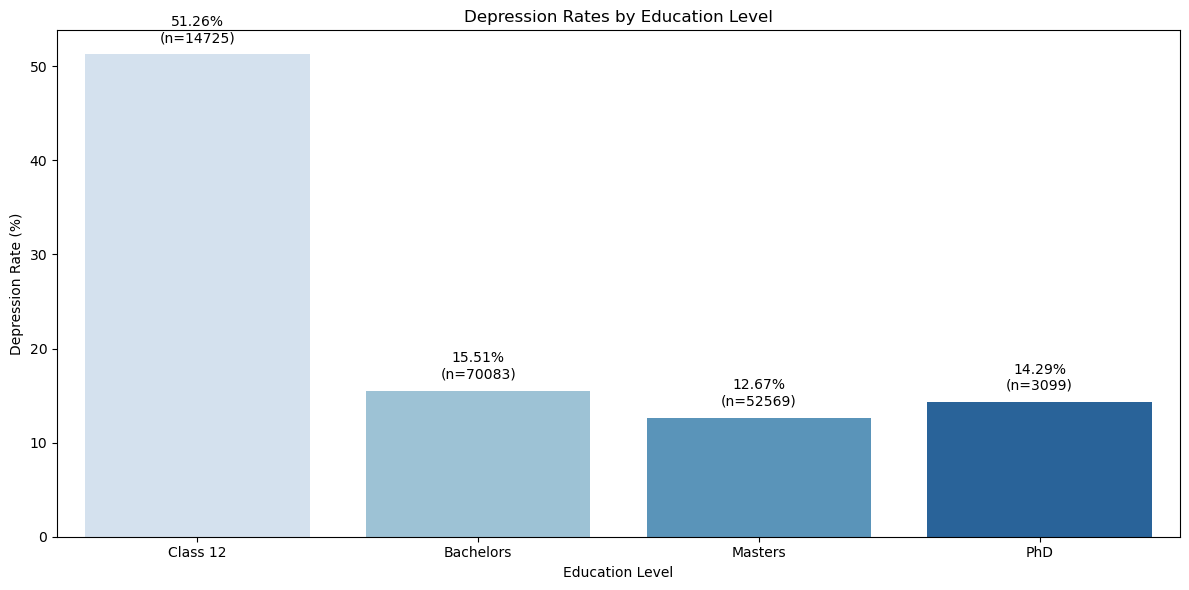


Detailed Statistics by Education Level:
Education Level  Total Count  Depression Count  Depression Rate (%)
       Class 12        14725              7548                51.26
      Bachelors        70083             10868                15.51
        Masters        52569              6662                12.67
            PhD         3099               443                14.29

Additional Insights:
Total number of people in dataset: 140476

Distribution of Education Levels:
Bachelors: 70083 people (49.9%)
Masters: 52569 people (37.4%)
Class 12: 14725 people (10.5%)
PhD: 3099 people (2.2%)


In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_education_depression(df):
    """
    Analyze depression rates across different education levels
    
    Parameters:
    df (pandas.DataFrame): Input dataframe with education columns and depression indicator 'y'
    """
    # Create a new column for education level
    df['Education_Level'] = 'Bachelors'  # Default value
    
    # Assign education levels based on the given conditions
    df.loc[df['Degree_Class 12'] == 1, 'Education_Level'] = 'Class 12'
    df.loc[df['Degree_Master'] == 1, 'Education_Level'] = 'Masters'
    df.loc[df['Degree_PhD'] == 1, 'Education_Level'] = 'PhD'
    
    # Calculate statistics for each education level
    education_stats = []
    
    for education in ['Class 12', 'Bachelors', 'Masters', 'PhD']:
        group = df[df['Education_Level'] == education]
        total_count = len(group)
        depression_count = group['y'].sum()
        depression_rate = (depression_count / total_count * 100) if total_count > 0 else 0
        
        education_stats.append({
            'Education Level': education,
            'Total Count': total_count,
            'Depression Count': depression_count,
            'Depression Rate (%)': round(depression_rate, 2)
        })
    
    # Convert to DataFrame
    results_df = pd.DataFrame(education_stats)
    
    # Create visualization
    plt.figure(figsize=(12, 6))
    
    # Create bar plot
    sns.barplot(data=results_df, 
                x='Education Level', 
                y='Depression Rate (%)',
                palette='Blues')
    
    plt.title('Depression Rates by Education Level')
    plt.xlabel('Education Level')
    plt.ylabel('Depression Rate (%)')
    
    # Add value labels on top of each bar
    for i, v in enumerate(results_df['Depression Rate (%)']):
        plt.text(i, v + 1, f'{v}%\n(n={results_df["Total Count"][i]})', 
                ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed statistics
    print("\nDetailed Statistics by Education Level:")
    print(results_df.to_string(index=False))
    
    # Additional insights
    print("\nAdditional Insights:")
    total_people = df['Education_Level'].count()
    print(f"Total number of people in dataset: {total_people}")
    print("\nDistribution of Education Levels:")
    education_dist = df['Education_Level'].value_counts()
    for level, count in education_dist.items():
        percentage = (count/total_people * 100)
        print(f"{level}: {count} people ({percentage:.1f}%)")

# Run the analysis
analyze_education_depression(df1)

#### People over the age of 30

C:\Users\kveske\AppData\Local\Temp\ipykernel_18008\4289096526.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df,


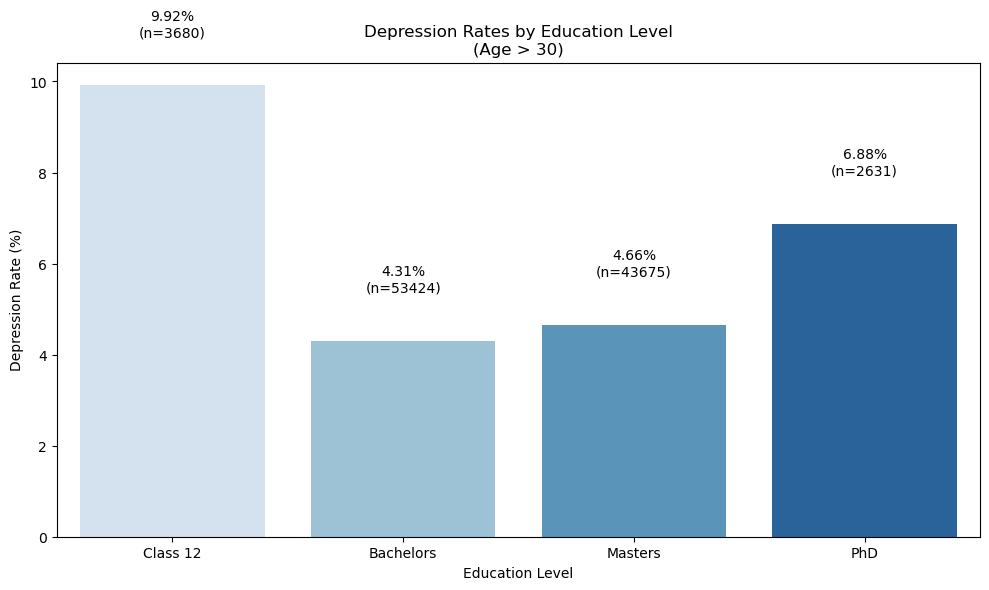


Detailed Statistics by Education Level (Age > 30):
Education Level  Total Count  Depression Count  Depression Rate (%)  Average Age
       Class 12         3680               365                 9.92         44.5
      Bachelors        53424              2300                 4.31         46.4
        Masters        43675              2037                 4.66         46.5
            PhD         2631               181                 6.88         45.8

Additional Insights:
Total people over 30 in dataset: 103410 (out of 140476 total)

Distribution of Education Levels (Age > 30):
Bachelors: 53424 people (51.7%)
Masters: 43675 people (42.2%)
Class 12: 3680 people (3.6%)
PhD: 2631 people (2.5%)

Age Statistics by Education Level:
                 mean  median   min   max
Education_Level                          
Bachelors        46.4    47.0  31.0  60.0
Class 12         44.5    43.0  31.0  60.0
Masters          46.5    47.0  31.0  60.0
PhD              45.8    46.0  31.0  60.0


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_education_depression_age(df):
    """
    Analyze depression rates across different education levels for people over 30
    
    Parameters:
    df (pandas.DataFrame): Input dataframe with education columns, age, and depression indicator 'y'
    """
    # Filter for age > 30
    df_filtered = df[df['Age'] > 30].copy()
    
    # Create a new column for education level
    df_filtered['Education_Level'] = 'Bachelors'  # Default value
    
    # Assign education levels based on the given conditions
    df_filtered.loc[df_filtered['Degree_Class 12'] == 1, 'Education_Level'] = 'Class 12'
    df_filtered.loc[df_filtered['Degree_Master'] == 1, 'Education_Level'] = 'Masters'
    df_filtered.loc[df_filtered['Degree_PhD'] == 1, 'Education_Level'] = 'PhD'
    
    # Calculate statistics for each education level
    education_stats = []
    
    for education in ['Class 12', 'Bachelors', 'Masters', 'PhD']:
        group = df_filtered[df_filtered['Education_Level'] == education]
        total_count = len(group)
        depression_count = group['y'].sum()
        depression_rate = (depression_count / total_count * 100) if total_count > 0 else 0
        avg_age = group['Age'].mean()
        
        education_stats.append({
            'Education Level': education,
            'Total Count': total_count,
            'Depression Count': depression_count,
            'Depression Rate (%)': round(depression_rate, 2),
            'Average Age': round(avg_age, 1)
        })
    
    # Convert to DataFrame
    results_df = pd.DataFrame(education_stats)
    
    # Create visualization
    plt.figure(figsize=(10, 6))
    
    # Depression rates bar plot
    sns.barplot(data=results_df, 
                x='Education Level', 
                y='Depression Rate (%)',
                palette='Blues')
    
    plt.title('Depression Rates by Education Level\n(Age > 30)')
    plt.xlabel('Education Level')
    plt.ylabel('Depression Rate (%)')
    
    # Add value labels on top of each bar
    for i, v in enumerate(results_df['Depression Rate (%)']):
        plt.text(i, v + 1, f'{v}%\n(n={results_df["Total Count"][i]})', 
                ha='center', va='bottom')
    
    plt.tight_layout()
    plt.savefig('education_plot.png')
    plt.show()
    
    # Print detailed statistics
    print("\nDetailed Statistics by Education Level (Age > 30):")
    print(results_df.to_string(index=False))
    
    # Additional insights
    print("\nAdditional Insights:")
    total_people = len(df_filtered)
    total_original = len(df)
    print(f"Total people over 30 in dataset: {total_people} (out of {total_original} total)")
    
    print("\nDistribution of Education Levels (Age > 30):")
    education_dist = df_filtered['Education_Level'].value_counts()
    for level, count in education_dist.items():
        percentage = (count/total_people * 100)
        print(f"{level}: {count} people ({percentage:.1f}%)")
    
    # Age statistics
    print("\nAge Statistics by Education Level:")
    age_stats = df_filtered.groupby('Education_Level')['Age'].agg(['mean', 'median', 'min', 'max'])
    print(age_stats.round(1))

# Run the analysis
analyze_education_depression_age(df1)

## 3. Let's find out amongst the top 3 jobs with the depression, what are the recorded lifestyle differences between whether they have depression or not.

#### Graphic designer
The job with the higest depression rate was graphic designer, let's find out what are the differences between the graphic designers who have it or not. 

In [81]:
import pandas as pd
import numpy as np
from scipy import stats

def analyze_lifestyle_differences(df, profession_column):
    """
    Compare lifestyle factors between depressed and non-depressed individuals in a specific profession
    """
    # Filter for the specific profession
    profession_df = df[df[profession_column] == 1]
    
    # Separate depressed and non-depressed groups
    depressed = profession_df[profession_df['y'] == 1]
    non_depressed = profession_df[profession_df['y'] == 0]
    
    # Numeric columns to analyze
    numeric_cols = ['Age', 'Pressure', 'CGPA', 'Satisfaction', 
                   'Work/Study Hours', 'Financial Stress']
    
    # Binary columns to analyze (calculating percentages)
    binary_cols = ['Gender_Male', 'Dietary Habits_Moderate', 'Dietary Habits_Unhealthy',
                  'Have you ever had suicidal thoughts ?_Yes', 
                  'Family History of Mental Illness_Yes',
                  'Sleep Duration_7-8 hours', 'Sleep Duration_Less than 5 hours',
                  'Sleep Duration_More than 8 hours']
    
    results = []
    
    # Analyze numeric columns
    for col in numeric_cols:
        dep_mean = depressed[col].mean()
        non_dep_mean = non_depressed[col].mean()
        
        results.append({
            'Factor': col,
            'Depressed (Mean)': round(dep_mean, 2),
            'Non-Depressed (Mean)': round(non_dep_mean, 2),
            'Difference': round(dep_mean - non_dep_mean, 2),
            'P-Value': round(stats.ttest_ind(depressed[col].dropna(), 
                                           non_depressed[col].dropna())[1], 4),
            'Depressed (%)': 'N/A',
            'Non-Depressed (%)': 'N/A'
        })
    
    # Analyze binary columns (as percentages)
    for col in binary_cols:
        dep_pct = depressed[col].mean() * 100
        non_dep_pct = non_depressed[col].mean() * 100
        
        # Calculate p-value using chi-square test
        contingency = pd.crosstab(profession_df['y'], profession_df[col])
        chi2, p_value = stats.chi2_contingency(contingency)[:2]
        
        results.append({
            'Factor': col,
            'Depressed (Mean)': 'N/A',
            'Non-Depressed (Mean)': 'N/A',
            'Difference': round(dep_pct - non_dep_pct, 2),
            'P-Value': round(p_value, 4),
            'Depressed (%)': round(dep_pct, 2),
            'Non-Depressed (%)': round(non_dep_pct, 2)
        })
    
    # Convert to DataFrame
    results_df = pd.DataFrame(results)
    
    # Sort by absolute difference
    results_df['Abs_Difference'] = abs(pd.to_numeric(results_df['Difference'], errors='coerce'))
    results_df = results_df.sort_values('Abs_Difference', ascending=False)
    results_df = results_df.drop('Abs_Difference', axis=1)
    
    # Print group sizes
    print(f"\nTotal counts in {profession_column.replace('Profession_', '')}:")
    print(f"Depressed: {len(depressed)}")
    print(f"Non-depressed: {len(non_depressed)}\n")
    
    return results_df

# Run analysis for Graphic Designers
results = analyze_lifestyle_differences(df1, 'Profession_Graphic Designer')
print("\nLifestyle Differences Analysis:")
print(results.to_string(index=False))


Total counts in Graphic Designer:
Depressed: 216
Non-depressed: 944


Lifestyle Differences Analysis:
                                   Factor Depressed (Mean) Non-Depressed (Mean)  Difference  P-Value Depressed (%) Non-Depressed (%)
Have you ever had suicidal thoughts ?_Yes              N/A                  N/A       47.40   0.0000         89.35             41.95
                 Dietary Habits_Unhealthy              N/A                  N/A       24.52   0.0000         55.56             31.04
                                      Age            27.88                44.45      -16.57   0.0000           N/A               N/A
         Sleep Duration_Less than 5 hours              N/A                  N/A       13.40   0.0001         35.65             22.25
                  Dietary Habits_Moderate              N/A                  N/A      -10.04   0.0057         24.07             34.11
                              Gender_Male              N/A                  N/A        8.60   0.025

#### Judge
Now let's see the lifestyle differnces between the Judges who have depression or not.

In [83]:
import pandas as pd
import numpy as np
from scipy import stats

def analyze_lifestyle_differences(df, profession_column):
    """
    Compare lifestyle factors between depressed and non-depressed individuals in a specific profession
    """
    # Filter for the specific profession
    profession_df = df[df[profession_column] == 1]
    
    # Separate depressed and non-depressed groups
    depressed = profession_df[profession_df['y'] == 1]
    non_depressed = profession_df[profession_df['y'] == 0]
    
    # Numeric columns to analyze
    numeric_cols = ['Age', 'Pressure', 'CGPA', 'Satisfaction', 
                   'Work/Study Hours', 'Financial Stress']
    
    # Binary columns to analyze (calculating percentages)
    binary_cols = ['Gender_Male', 'Dietary Habits_Moderate', 'Dietary Habits_Unhealthy',
                  'Have you ever had suicidal thoughts ?_Yes', 
                  'Family History of Mental Illness_Yes',
                  'Sleep Duration_7-8 hours', 'Sleep Duration_Less than 5 hours',
                  'Sleep Duration_More than 8 hours']
    
    results = []
    
    # Analyze numeric columns
    for col in numeric_cols:
        dep_mean = depressed[col].mean()
        non_dep_mean = non_depressed[col].mean()
        
        results.append({
            'Factor': col,
            'Depressed (Mean)': round(dep_mean, 2),
            'Non-Depressed (Mean)': round(non_dep_mean, 2),
            'Difference': round(dep_mean - non_dep_mean, 2),
            'P-Value': round(stats.ttest_ind(depressed[col].dropna(), 
                                           non_depressed[col].dropna())[1], 4),
            'Depressed (%)': 'N/A',
            'Non-Depressed (%)': 'N/A'
        })
    
    # Analyze binary columns (as percentages)
    for col in binary_cols:
        dep_pct = depressed[col].mean() * 100
        non_dep_pct = non_depressed[col].mean() * 100
        
        # Calculate p-value using chi-square test
        contingency = pd.crosstab(profession_df['y'], profession_df[col])
        chi2, p_value = stats.chi2_contingency(contingency)[:2]
        
        results.append({
            'Factor': col,
            'Depressed (Mean)': 'N/A',
            'Non-Depressed (Mean)': 'N/A',
            'Difference': round(dep_pct - non_dep_pct, 2),
            'P-Value': round(p_value, 4),
            'Depressed (%)': round(dep_pct, 2),
            'Non-Depressed (%)': round(non_dep_pct, 2)
        })
    
    # Convert to DataFrame
    results_df = pd.DataFrame(results)
    
    # Sort by absolute difference
    results_df['Abs_Difference'] = abs(pd.to_numeric(results_df['Difference'], errors='coerce'))
    results_df = results_df.sort_values('Abs_Difference', ascending=False)
    results_df = results_df.drop('Abs_Difference', axis=1)
    
    # Print group sizes
    print(f"\nTotal counts in {profession_column.replace('Profession_', '')}:")
    print(f"Depressed: {len(depressed)}")
    print(f"Non-depressed: {len(non_depressed)}\n")
    
    return results_df

# Run analysis for Graphic Designers
results = analyze_lifestyle_differences(df1, 'Profession_Judge')
print("\nLifestyle Differences Analysis:")
print(results.to_string(index=False))


Total counts in Judge:
Depressed: 186
Non-depressed: 1524


Lifestyle Differences Analysis:
                                   Factor Depressed (Mean) Non-Depressed (Mean)  Difference  P-Value Depressed (%) Non-Depressed (%)
Have you ever had suicidal thoughts ?_Yes              N/A                  N/A       46.69   0.0000         90.32             43.64
                 Dietary Habits_Unhealthy              N/A                  N/A       18.13   0.0000         45.16             27.03
                                      Age            32.44                44.73      -12.29   0.0000           N/A               N/A
         Sleep Duration_Less than 5 hours              N/A                  N/A        7.52   0.0268         29.57             22.05
         Sleep Duration_More than 8 hours              N/A                  N/A       -6.55   0.0561          17.2             23.75
                  Dietary Habits_Moderate              N/A                  N/A       -4.60   0.2594         

#### HR Managers
Now let's see the lifestyle differnces between the HR managers who have depression or not.

In [85]:
import pandas as pd
import numpy as np
from scipy import stats

def analyze_lifestyle_differences(df, profession_column):
    """
    Compare lifestyle factors between depressed and non-depressed individuals in a specific profession
    """
    # Filter for the specific profession
    profession_df = df[df[profession_column] == 1]
    
    # Separate depressed and non-depressed groups
    depressed = profession_df[profession_df['y'] == 1]
    non_depressed = profession_df[profession_df['y'] == 0]
    
    # Numeric columns to analyze
    numeric_cols = ['Age', 'Pressure', 'CGPA', 'Satisfaction', 
                   'Work/Study Hours', 'Financial Stress']
    
    # Binary columns to analyze (calculating percentages)
    binary_cols = ['Gender_Male', 'Dietary Habits_Moderate', 'Dietary Habits_Unhealthy',
                  'Have you ever had suicidal thoughts ?_Yes', 
                  'Family History of Mental Illness_Yes',
                  'Sleep Duration_7-8 hours', 'Sleep Duration_Less than 5 hours',
                  'Sleep Duration_More than 8 hours']
    
    results = []
    
    # Analyze numeric columns
    for col in numeric_cols:
        dep_mean = depressed[col].mean()
        non_dep_mean = non_depressed[col].mean()
        
        results.append({
            'Factor': col,
            'Depressed (Mean)': round(dep_mean, 2),
            'Non-Depressed (Mean)': round(non_dep_mean, 2),
            'Difference': round(dep_mean - non_dep_mean, 2),
            'P-Value': round(stats.ttest_ind(depressed[col].dropna(), 
                                           non_depressed[col].dropna())[1], 4),
            'Depressed (%)': 'N/A',
            'Non-Depressed (%)': 'N/A'
        })
    
    # Analyze binary columns (as percentages)
    for col in binary_cols:
        dep_pct = depressed[col].mean() * 100
        non_dep_pct = non_depressed[col].mean() * 100
        
        # Calculate p-value using chi-square test
        contingency = pd.crosstab(profession_df['y'], profession_df[col])
        chi2, p_value = stats.chi2_contingency(contingency)[:2]
        
        results.append({
            'Factor': col,
            'Depressed (Mean)': 'N/A',
            'Non-Depressed (Mean)': 'N/A',
            'Difference': round(dep_pct - non_dep_pct, 2),
            'P-Value': round(p_value, 4),
            'Depressed (%)': round(dep_pct, 2),
            'Non-Depressed (%)': round(non_dep_pct, 2)
        })
    
    # Convert to DataFrame
    results_df = pd.DataFrame(results)
    
    # Sort by absolute difference
    results_df['Abs_Difference'] = abs(pd.to_numeric(results_df['Difference'], errors='coerce'))
    results_df = results_df.sort_values('Abs_Difference', ascending=False)
    results_df = results_df.drop('Abs_Difference', axis=1)
    
    # Print group sizes
    print(f"\nTotal counts in {profession_column.replace('Profession_', '')}:")
    print(f"Depressed: {len(depressed)}")
    print(f"Non-depressed: {len(non_depressed)}\n")
    
    return results_df

# Run analysis for Graphic Designers
results = analyze_lifestyle_differences(df1, 'Profession_HR Manager')
print("\nLifestyle Differences Analysis:")
print(results.to_string(index=False))


Total counts in HR Manager:
Depressed: 429
Non-depressed: 3589


Lifestyle Differences Analysis:
                                   Factor Depressed (Mean) Non-Depressed (Mean)  Difference  P-Value Depressed (%) Non-Depressed (%)
Have you ever had suicidal thoughts ?_Yes              N/A                  N/A       43.93   0.0000         86.95             43.02
                 Dietary Habits_Unhealthy              N/A                  N/A       21.21   0.0000         55.48             34.27
                                      Age            28.39                45.66      -17.28   0.0000           N/A               N/A
         Sleep Duration_Less than 5 hours              N/A                  N/A       16.84   0.0000         40.33             23.49
         Sleep Duration_More than 8 hours              N/A                  N/A       -9.22   0.0000         16.55             25.77
                  Dietary Habits_Moderate              N/A                  N/A       -6.19   0.0090    

## 4. Let's find out the lifestyle differences between all the depressed and non-depressed people. 
We're analyzing lifestyle differences between depressed and non-depressed individuals, excluding educational level and job factors. For numeric variables (like financial stress and satisfaction), we use Cohen's d effect size to standardize the differences. 

This standardization is crucial because raw differences can be misleading - for example, a difference in financial stress of 1.08 (4.0 vs 2.92) might represent a larger practical difference than a satisfaction difference of 0.89 (2.94 vs 2.04), despite having similar absolute values. 

For binary variables, we use risk ratios to quantify the differences. This comprehensive approach allows us to compare differences across different types of variables and different scales."

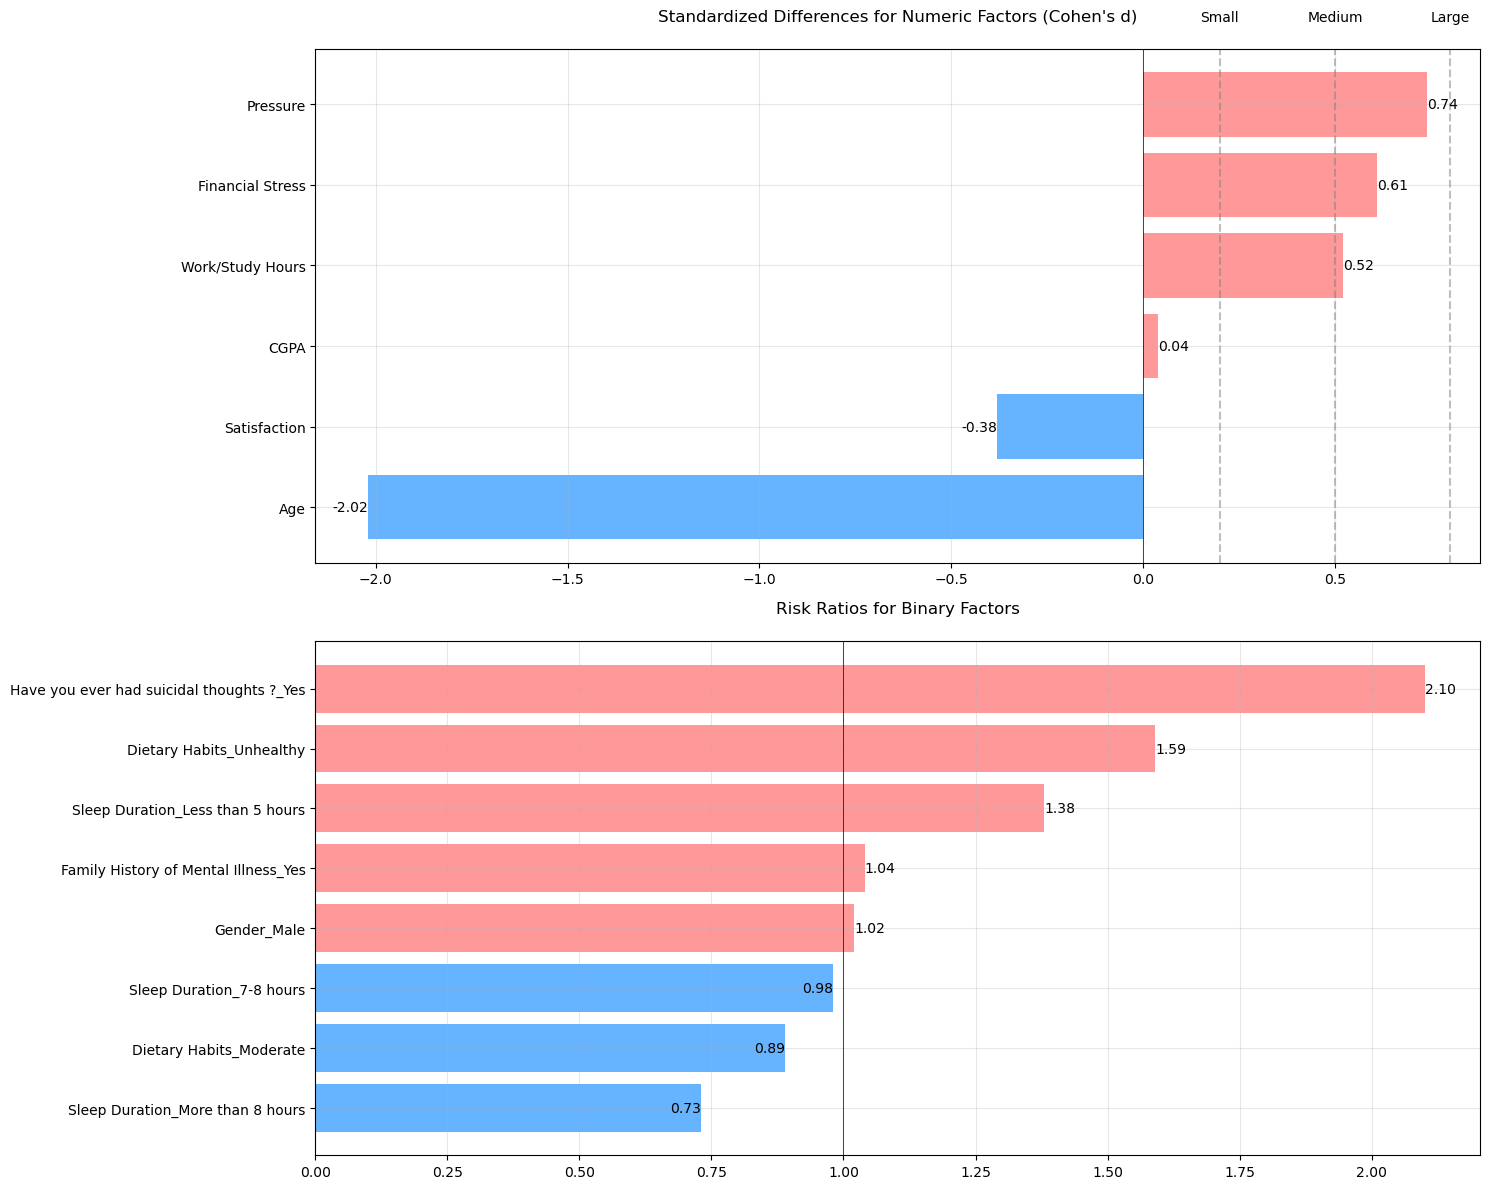


NUMERIC FACTORS ANALYSIS:
          Factor  Depressed (Mean)  Non-Depressed (Mean)  Raw Difference  Standardized Difference  Range %  P-Value
        Pressure              3.81                  2.85            0.96                     0.74    23.96   0.0000
Financial Stress              3.67                  2.84            0.83                     0.61    20.82   0.0000
Work/Study Hours              7.82                  5.90            1.92                     0.52    15.98   0.0000
            CGPA              7.69                  7.62            0.06                     0.04     1.27   0.0004
    Satisfaction              2.54                  3.06           -0.52                    -0.38   -12.97   0.0000
             Age             25.55                 43.68          -18.14                    -2.02   -43.18   0.0000


BINARY FACTORS ANALYSIS:
                                   Factor  Depressed (%)  Non-Depressed (%)  Raw Difference  Risk Ratio  P-Value
Have you ever had sui

In [7]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

def preprocess_data(df):
    """
    Prepare the data for analysis by handling any missing values and ensuring correct types
    """
    # Create a copy to avoid modifying the original
    processed_df = df.copy()
    
    # Ensure numeric columns are float type
    numeric_cols = ['Age', 'Pressure', 'CGPA', 'Satisfaction', 
                   'Work/Study Hours', 'Financial Stress']
    for col in numeric_cols:
        processed_df[col] = pd.to_numeric(processed_df[col], errors='coerce')
    
    # Ensure binary columns are 1/0
    binary_cols = ['Gender_Male', 'Dietary Habits_Moderate', 'Dietary Habits_Unhealthy',
                  'Have you ever had suicidal thoughts ?_Yes', 
                  'Family History of Mental Illness_Yes',
                  'Sleep Duration_7-8 hours', 'Sleep Duration_Less than 5 hours',
                  'Sleep Duration_More than 8 hours']
    for col in binary_cols:
        processed_df[col] = processed_df[col].astype(float)
    
    return processed_df

def analyze_lifestyle_differences_standardized(df):
    """
    Compare lifestyle factors between depressed and non-depressed individuals with standardized differences
    """
    # Preprocess the data
    df = preprocess_data(df)
    
    # Separate depressed and non-depressed groups
    depressed = df[df['y'] == 1]
    non_depressed = df[df['y'] == 0]
    
    # Numeric columns to analyze
    numeric_cols = ['Age', 'Pressure', 'CGPA', 'Satisfaction', 
                   'Work/Study Hours', 'Financial Stress']
    
    # Binary columns to analyze
    binary_cols = ['Gender_Male', 'Dietary Habits_Moderate', 'Dietary Habits_Unhealthy',
                  'Have you ever had suicidal thoughts ?_Yes', 
                  'Family History of Mental Illness_Yes',
                  'Sleep Duration_7-8 hours', 'Sleep Duration_Less than 5 hours',
                  'Sleep Duration_More than 8 hours']
    
    results = []
    
    # Analyze numeric columns with standardization
    for col in numeric_cols:
        dep_mean = depressed[col].mean()
        non_dep_mean = non_depressed[col].mean()
        raw_diff = dep_mean - non_dep_mean
        
        # Calculate Cohen's d effect size
        pooled_std = np.sqrt((depressed[col].var() + non_depressed[col].var()) / 2)
        standardized_diff = raw_diff / pooled_std if pooled_std != 0 else 0
        
        # Calculate the range of the variable
        col_range = df[col].max() - df[col].min()
        # Calculate difference as percentage of range
        range_percentage = (raw_diff / col_range * 100) if col_range != 0 else 0
        
        results.append({
            'Factor': col,
            'Depressed (Mean)': round(dep_mean, 2),
            'Non-Depressed (Mean)': round(non_dep_mean, 2),
            'Raw Difference': round(raw_diff, 2),
            'Standardized Difference': round(standardized_diff, 2),
            'Range %': round(range_percentage, 2),
            'P-Value': round(stats.ttest_ind(depressed[col].dropna(), 
                                           non_depressed[col].dropna())[1], 4),
            'Type': 'Numeric'
        })
    
    # Analyze binary columns
    for col in binary_cols:
        dep_pct = depressed[col].mean() * 100
        non_dep_pct = non_depressed[col].mean() * 100
        raw_diff = dep_pct - non_dep_pct
        
        # Calculate risk ratio
        risk_ratio = dep_pct / non_dep_pct if non_dep_pct != 0 else np.inf
        
        contingency = pd.crosstab(df['y'], df[col])
        chi2, p_value = stats.chi2_contingency(contingency)[:2]
        
        results.append({
            'Factor': col,
            'Depressed (%)': round(dep_pct, 2),
            'Non-Depressed (%)': round(non_dep_pct, 2),
            'Raw Difference': round(raw_diff, 2),
            'Risk Ratio': round(risk_ratio, 2),
            'P-Value': round(p_value, 4),
            'Type': 'Binary'
        })
    
    # Convert to DataFrame
    results_df = pd.DataFrame(results)
    
    # Create visualizations
    plt.style.use('default')  # Using default matplotlib style
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))
    
    # Set background color
    fig.patch.set_facecolor('white')
    ax1.set_facecolor('white')
    ax2.set_facecolor('white')
    
    # Plot standardized differences for numeric variables
    numeric_data = results_df[results_df['Type'] == 'Numeric'].sort_values('Standardized Difference')
    
    colors1 = ['#ff9999' if x > 0 else '#66b3ff' for x in numeric_data['Standardized Difference']]
    bars1 = ax1.barh(numeric_data['Factor'], numeric_data['Standardized Difference'], color=colors1)
    ax1.set_title('Standardized Differences for Numeric Factors (Cohen\'s d)', pad=20, fontsize=12)
    ax1.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
    ax1.grid(True, alpha=0.3)
    
    # Add value labels
    for bar in bars1:
        width = bar.get_width()
        ax1.text(width, bar.get_y() + bar.get_height()/2, 
                f'{width:.2f}', 
                ha='left' if width > 0 else 'right',
                va='center',
                fontsize=10)
    
    # Add interpretation guidelines
    ax1.axvline(x=0.2, color='gray', linestyle='--', alpha=0.5)
    ax1.axvline(x=0.5, color='gray', linestyle='--', alpha=0.5)
    ax1.axvline(x=0.8, color='gray', linestyle='--', alpha=0.5)
    ax1.text(0.2, len(numeric_data), 'Small', ha='center', va='bottom')
    ax1.text(0.5, len(numeric_data), 'Medium', ha='center', va='bottom')
    ax1.text(0.8, len(numeric_data), 'Large', ha='center', va='bottom')
    
    # Plot risk ratios for binary variables
    binary_data = results_df[results_df['Type'] == 'Binary'].sort_values('Risk Ratio')
    
    colors2 = ['#ff9999' if x > 1 else '#66b3ff' for x in binary_data['Risk Ratio']]
    bars2 = ax2.barh(binary_data['Factor'], binary_data['Risk Ratio'], color=colors2)
    ax2.set_title('Risk Ratios for Binary Factors', pad=20, fontsize=12)
    ax2.axvline(x=1, color='black', linestyle='-', linewidth=0.5)
    ax2.grid(True, alpha=0.3)
    
    # Add value labels
    for bar in bars2:
        width = bar.get_width()
        ax2.text(width, bar.get_y() + bar.get_height()/2, 
                f'{width:.2f}', 
                ha='left' if width > 1 else 'right',
                va='center',
                fontsize=10)
    
    plt.tight_layout()
    plt.savefig('lifestyle.png')
    plt.show()
    
    # Format and display the results table
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', None)
    
    # Format the results table for better readability
    formatted_results = results_df.copy()
    
    # Separate numeric and binary results
    numeric_results = formatted_results[formatted_results['Type'] == 'Numeric'].sort_values(
        by='Standardized Difference', ascending=False
    )[['Factor', 'Depressed (Mean)', 'Non-Depressed (Mean)', 'Raw Difference', 
       'Standardized Difference', 'Range %', 'P-Value']]
    
    binary_results = formatted_results[formatted_results['Type'] == 'Binary'].sort_values(
        by='Risk Ratio', ascending=False
    )[['Factor', 'Depressed (%)', 'Non-Depressed (%)', 'Raw Difference', 'Risk Ratio', 'P-Value']]
    
    print("\nNUMERIC FACTORS ANALYSIS:")
    print("=" * 100)
    print(numeric_results.to_string(index=False))
    
    print("\n\nBINARY FACTORS ANALYSIS:")
    print("=" * 100)
    print(binary_results.to_string(index=False))
    
    return formatted_results

# Run the analysis
results = analyze_lifestyle_differences_standardized(df1)

## 5. Let's find out the count of depression cases across different age groups.

C:\Users\kveske\AppData\Local\Temp\ipykernel_2980\2079823795.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_stats = df.groupby('Age_Group').agg({
C:\Users\kveske\AppData\Local\Temp\ipykernel_2980\2079823795.py:46: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = age_stats['Total Count'][i]


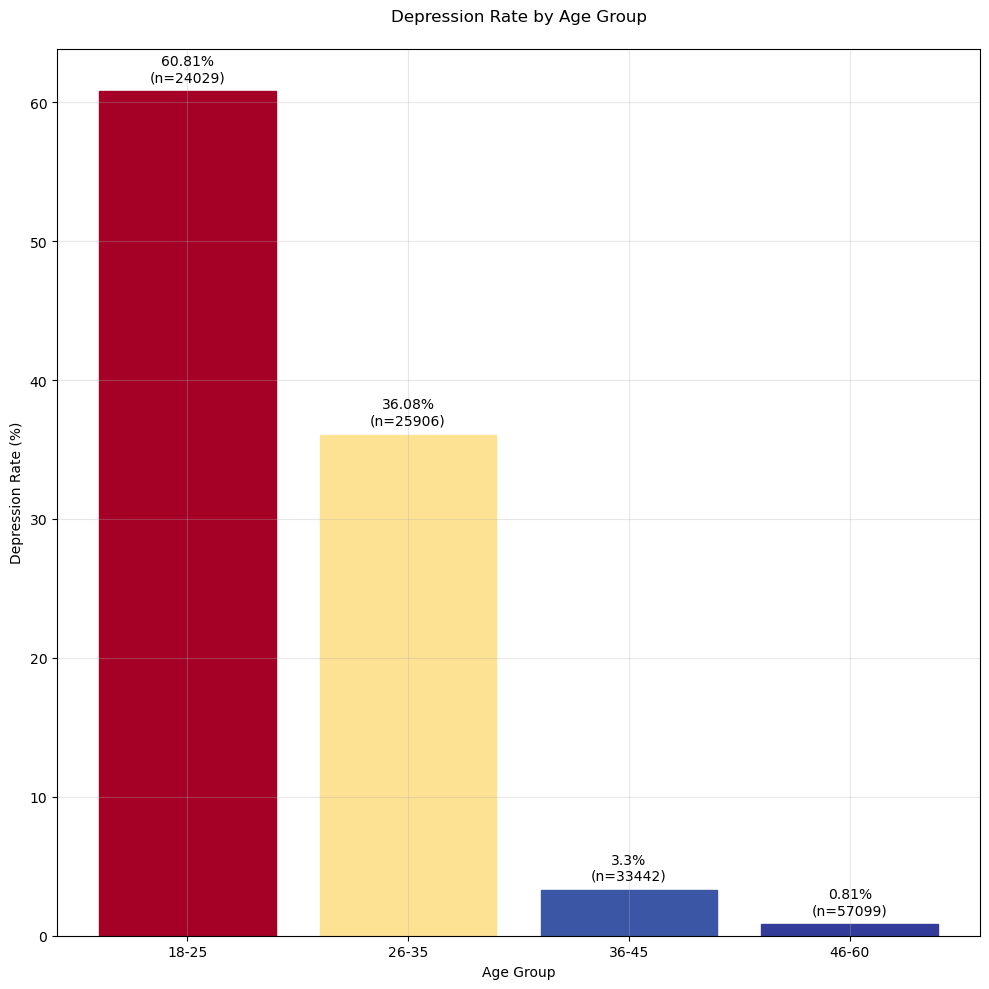


Detailed Statistics by Age Group:
           Total Count  Depressed Count  Depression Rate
Age_Group                                               
18-25            24029            14611            60.81
26-35            25906             9346            36.08
36-45            33442             1102             3.30
46-60            57099              462             0.81

Key Insights:
Most affected age group: 18-25
- Depression rate: 60.81%
- Sample size: 24029.0

Least affected age group: 46-60
- Depression rate: 0.81%
- Sample size: 57099.0


In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_depression_by_age(df):
    """
    Analyze depression rates across different age groups (18-60)
    """
    # Create broader age groups
    df['Age_Group'] = pd.cut(df['Age'], 
                            bins=[0, 25, 35, 45, 60],
                            labels=['18-25', '26-35', '36-45', '46-60'])
    
    # Calculate depression statistics for each age group
    age_stats = df.groupby('Age_Group').agg({
        'y': ['count', 'sum', 'mean']
    }).round(4)
    
    # Flatten column names
    age_stats.columns = ['Total Count', 'Depressed Count', 'Depression Rate']
    
    # Convert depression rate to percentage
    age_stats['Depression Rate'] = (age_stats['Depression Rate'] * 100).round(2)
    
    # Create visualization
    plt.figure(figsize=(10, 10))
    
    # Bar plot
    bars = plt.bar(range(len(age_stats.index)), age_stats['Depression Rate'])
    
    # Color bars based on depression rate
    colors = plt.cm.RdYlBu_r(age_stats['Depression Rate']/age_stats['Depression Rate'].max())
    for bar, color in zip(bars, colors):
        bar.set_color(color)
    
    # Customize plot
    plt.title('Depression Rate by Age Group', pad=20)
    plt.xlabel('Age Group')
    plt.ylabel('Depression Rate (%)')
    plt.xticks(range(len(age_stats.index)), age_stats.index, rotation=0)
    plt.grid(True, alpha=0.3)
    
    # Add value labels on bars
    for i, v in enumerate(age_stats['Depression Rate']):
        count = age_stats['Total Count'][i]
        plt.text(i, v + 0.5, f'{v}%\n(n={count})', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed statistics
    print("\nDetailed Statistics by Age Group:")
    print(age_stats.to_string())
    
    # Calculate some additional insights
    most_affected = age_stats.loc[age_stats['Depression Rate'].idxmax()]
    least_affected = age_stats.loc[age_stats['Depression Rate'].idxmin()]
    
    print("\nKey Insights:")
    print(f"Most affected age group: {age_stats['Depression Rate'].idxmax()}")
    print(f"- Depression rate: {most_affected['Depression Rate']}%")
    print(f"- Sample size: {most_affected['Total Count']}")
    
    print(f"\nLeast affected age group: {age_stats['Depression Rate'].idxmin()}")
    print(f"- Depression rate: {least_affected['Depression Rate']}%")
    print(f"- Sample size: {least_affected['Total Count']}")
    
    return age_stats

# Run the analysis
age_depression_stats = analyze_depression_by_age(df1)